In [1]:
import cobra
from cobra.io.mat import *
import warnings
warnings.simplefilter('ignore')
from cobra.sampling import sample
import os
cpus = os.cpu_count()

model = load_matlab_model("models/GEM_Recon2_thermocurated_redHUMAN.mat")
co    = model.problem.Constraint(model.reactions.biomass.flux_expression, lb=.01 * model.optimize().objective_value)
model.add_cons_vars([co])

This model seems to have metCharge instead of metCharges field. Will use metCharge for what metCharges represents.
This model seems to have metHMDB instead of metHMDBID field. Will use metHMDB for what metHMDBID represents.
No defined compartments in model model. Compartments will be deduced heuristically using regular expressions.
Using regular expression found the following compartments:c, e, g, l, m, n, r, x


Scaling...
 A: min|aij| =  1.000e+00  max|aij| =  1.000e+00  ratio =  1.000e+00
Problem data seem to be well scaled


In [7]:
model.reactions.get_by_id('r0399').bounds = (0, 100)
model.reactions.get_by_id('PHETHPTOX2').bounds = (0, 100)
model.reactions.get_by_id('r0403').bounds = (0, 100)
model.reactions.get_by_id('DHPR').bounds  = (0, 100)
model.reactions.get_by_id('DHPR2').bounds  = (0, 100)
model.reactions.get_by_id('r0398').bounds  = (0, 100)
#model.reactions.get_by_id('HMR_6728').bounds

In [8]:
from cobra.sampling import OptGPSampler, ACHRSampler

optgp = OptGPSampler(model, processes=cpus, thinning=100)
s = optgp.sample(1000)

In [29]:

rxn_list = ['biomass', 'r0399', 'PHETHPTOX2', 'r0403', 'DHPR', 'DHPR2', 'r0398']


formulas =  [model.reactions.get_by_id(r).reaction if r != 'biomass' else 'biomass' for r in rxn_list]

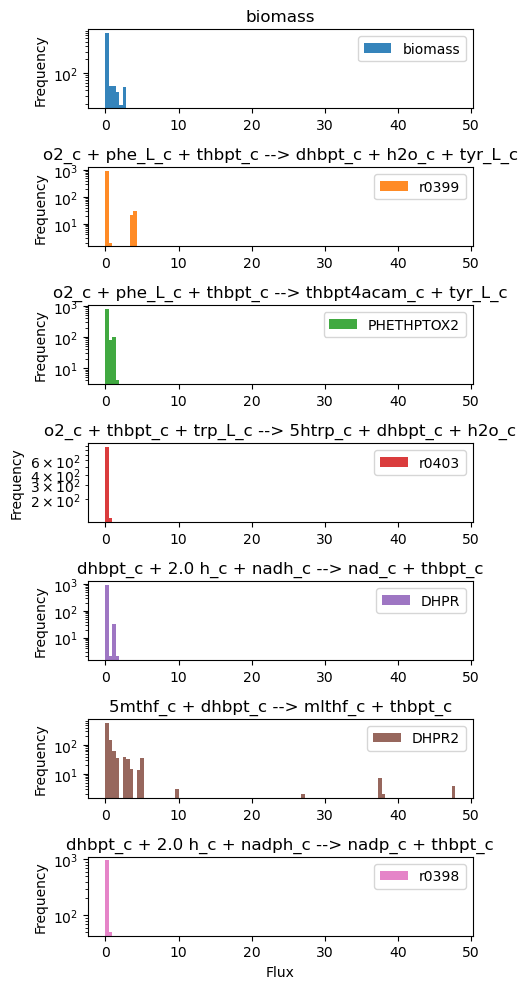

In [31]:
import matplotlib.pyplot as plt


#fig, axes = plt.subplots(nrows=4, ncols=4)
s[rxn_list].plot.hist(bins=100, alpha=0.9, figsize=(5,10), subplots=True, sharey=False, 
                      sharex=False, logy = True, title = formulas, ylabel = ['', '', ''], grid=False)
plt.xlabel('Flux') 
#plt.ylabel(None)
#plt.ylabel("common Y")
#fig.supylabel('common y label')
plt.tight_layout()
plt.show()


In [36]:
s.to_parquet("results/data/flux_samples.parquet.gzip", compression='gzip')